In [1]:
#Allow Notebook to Import from Comp_Chem_Package
import sys
sys.path.append("..\\Comp_Chem_Package")

import numpy as np
from rkr import rkr
from scipy.optimize import curve_fit
from diatomicConstants import diatomicConstants
from diatomicPotentials import morsePotential as morsePotential

#Set up Graphing Abillties with Plotly
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
figure = {
   "data":[],
   "layout":{
       "xaxis":{"title":"Bond Distance in Angstroms"},
       "yaxis":{"title":"Energy in Wavenumbers"}
   }
}


Generating RKR Potential


  2%|█▎                                                                            | 161/10005 [00:00<06:00, 27.27it/s]..\Comp_Chem_Package\rkr.py:69: RuntimeWarning:

invalid value encountered in sqrt

..\Comp_Chem_Package\rkr.py:95: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.

..\Comp_Chem_Package\rkr.py:86: RuntimeWarning:

invalid value encountered in sqrt




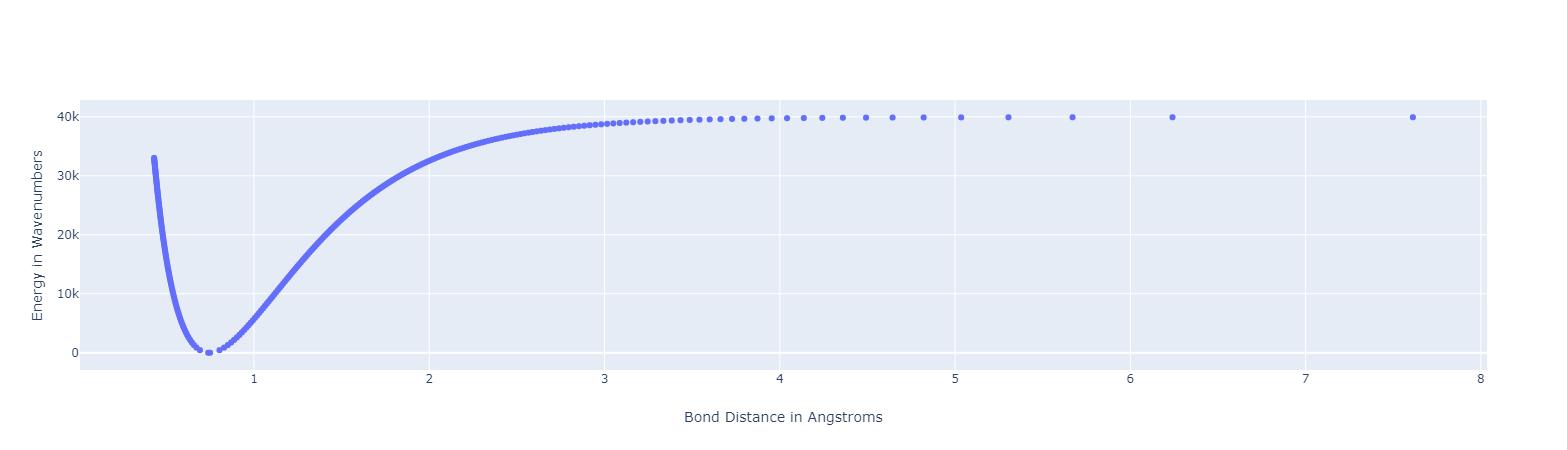

In [2]:
#Generate RKR Graph
RKR = rkr()

#Ground State H2 Diatomic Constants
diatomic = diatomicConstants(
    state = "X",
    T = 0, 
    w = 4401.21, 
    wx = 121.33, 
    wy = 0, 
    wz = 0, 
    B = 60.853, 
    a = 3.062, 
    y = 0, 
    D = 0.0471, 
    re = 0.74144,
    u = 0.5
)

RKR.setDiatomicConstants(diatomic)

x, y = RKR.graphData(.1)

figure["data"].append(
    {
        "type":"scatter",
        "x":x,
        "y":y,
        "connectgaps":True,
        "mode":"markers",
        "name":"RKR Potential"
    }
)

iplot(figure)

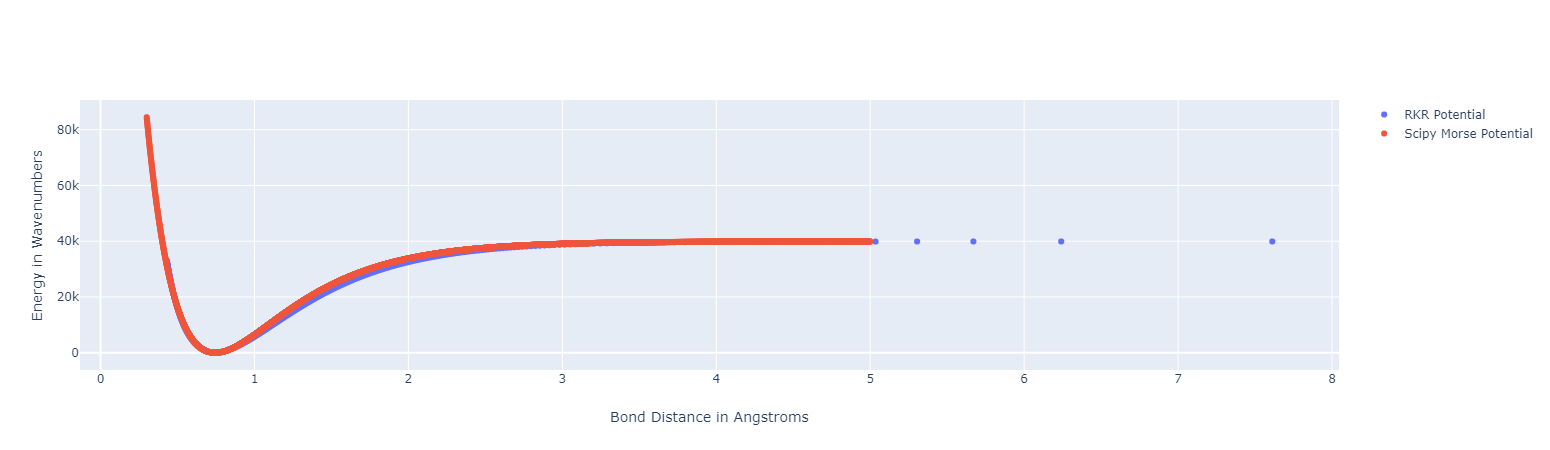

In [3]:
#Fit a Morse Potential using Scipy Optimize
scipyMorse = morsePotential()

scipyMorse.fitPotential(x, y)

scipyMorseX, scipyMorseY = scipyMorse.graphData(.3, 5)

figure["data"].append(
    {
        "type":"scatter",
        "x":scipyMorseX,
        "y":scipyMorseY,
        "connectgaps":True,
        "mode":"markers",
        "name":"Scipy Morse Potential"
    }
)

iplot(figure)

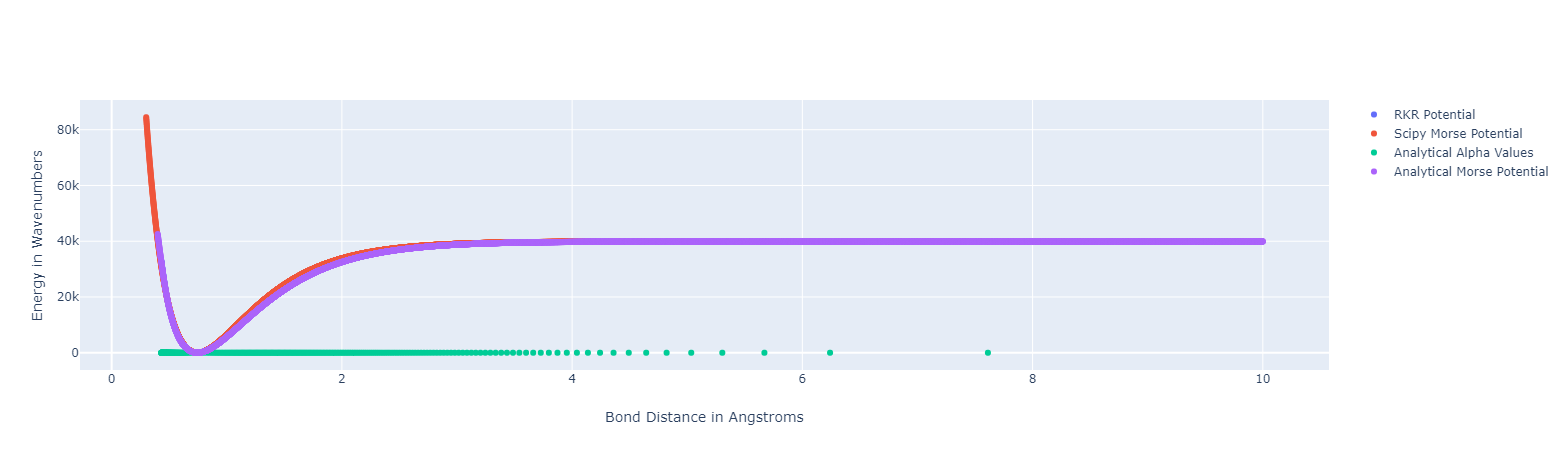

In [4]:
#Perform Analytical Interpolation/Extrapolation
analyticalMorse = morsePotential()
analyticalMorse.fitPotential(x, y)

#Build a new curvature constant for each RKR point and graph the curvature points
def buildA(r, E):
    squareRoot = np.sqrt( (E) / analyticalMorse.D)
    
    #if the energy is equal to the Depth of the well,
    #then do not negate the square root to allow the equation 
    #to generate the a flat morse potential to reflect the 
    #horizontal asymptote of the more potential as r->inf
    if(r > analyticalMorse.Re and squareRoot != 1):
        squareRoot *= -1
        
    return -np.log(1 + squareRoot) / (r - analyticalMorse.Re) 

a = []
for index, r in enumerate(x):
    a.append(buildA(r, y[index]))

figure["data"].append(
    {
        "type":"scatter",
        "x":x,
        "y":a,
        "connectgaps":True,
        "mode":"markers",
        "name":"Analytical Alpha Values"
    }
)

#Set up the interpolated morse potential
analyticalMorseX = []
analyticalMorseY = []
R = []
E = []
dr = 0.001
r = 0.4

#begin graphing the data for the interpolated morse potential and graph said data
while(r < 10):
    
    rInput = r
    
    deltaFunction = lambda rkrR : abs(rkrR - r)
    analyticalMorse.a = [a[x.index(min(x, key=deltaFunction))]]    
    
    #check if dealing with the right asymptote then provide the appropriate rInput value
    if(analyticalMorse.a == a[len(a)-1]):
        rInput = max(x)
    
    analyticalMorseX.append(r)
    analyticalMorseY.append( analyticalMorse.equation(rInput) )
    
    r += dr
    
figure["data"].append(
    {
        "type":"scatter",
        "x":analyticalMorseX,
        "y":analyticalMorseY,
        "connectgaps":True,
        "mode":"markers",
        "name":"Analytical Morse Potential"
    }
)

iplot(figure)

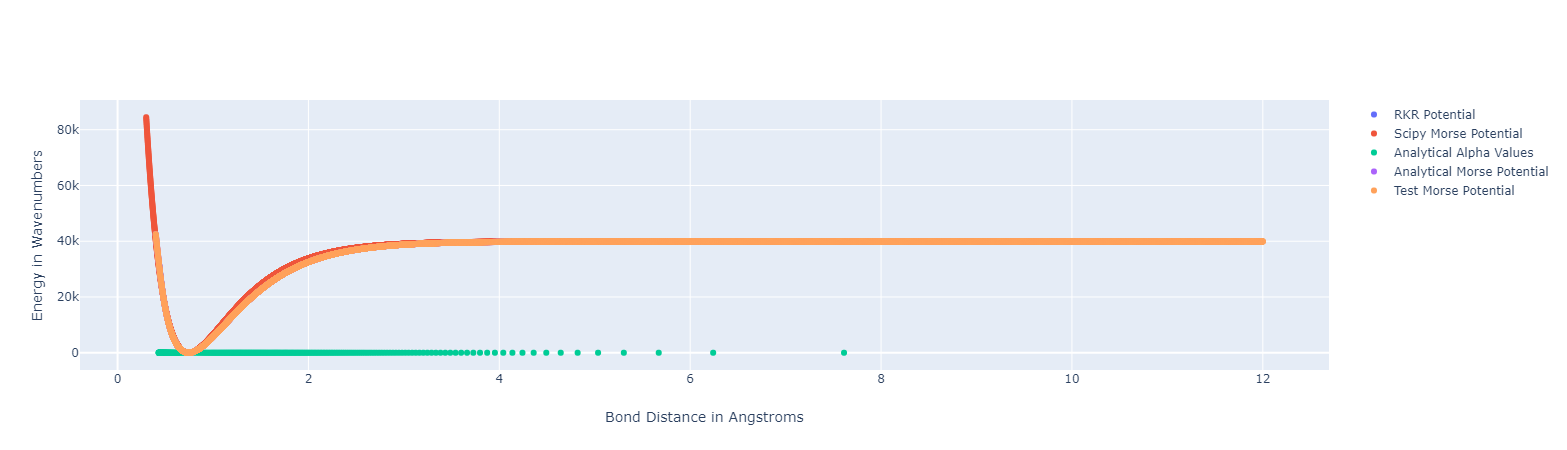

In [5]:
#Testing for the Morse Potential Built in Analytical Interpolation Fitting System
testMorse = morsePotential()

testMorse.fitPotential(x, y, True)
testMorseX, testMorseY = testMorse.graphData(.4, 12)


figure["data"].append(
    {
        "type":"scatter",
        "x":testMorseX,
        "y":testMorseY,
        "connectgaps":True,
        "mode":"markers",
        "name":"Test Morse Potential"
    }
)

iplot(figure)